In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
#from numpy.polynomial import polynomial as P
#from mpl_toolkits.mplot3d.axes3d import mpl
import matplotlib.cm as cm
#from matplotlib.colors import ListedColormap

In [2]:
N=25
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5e-3*ec/(6.62e-34)
w_a=2*np.pi*1.5e-3*ec/(6.62e-34)
w_p=2*np.pi*1.5e-3*ec/(6.62e-34)
g=(1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e12
gamma=0.001e12
alpha=0.75*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=50:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.01
tlist=np.array(tlist)



In [3]:
sm=tensor(qeye(N),destroy(2))
a=tensor(destroy(N),qeye(2))
phi_c=coherent(N,0)#state related to cavity field
phi_a=fock(2,0)#state related to dot
phi1=tensor(phi_c,phi_a)

#No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
#phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
#rho1=ket2dm(phi_expected)
b=tensor(destroy(N),qeye(2))

In [4]:
n_the_exc=0
c_ops=[]

#cavity relaxation
rate=kappa*(1+n_the_exc)
if rate>0:
    c_ops.append(np.sqrt(rate)*a)

#cavity excitation if temperature is >0
rate=kappa*n_the_exc
if rate>0:
    c_ops.append(np.sqrt(rate)*a.dag())
    
#qubuit relaxation
rate=gamma
if rate>0:
    c_ops.append(np.sqrt(rate)*sm)
#c_ops=np.array(c_ops)

In [5]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        #print(s)
    return f

In [6]:
def d1_drive(tlist,args):

    f=0  
    s=0
    p=0
    t_drive=np.array([0.1e-12,1.00e-11])

    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=((((1.2)*np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[0]))
    #print(s)
    return f

In [7]:
w_ph=(1.38e-23)*(10)/(6.62e-34)

In [8]:
H_o=w_c*a.dag()*a + w_a*sm.dag()*sm + g*(a.dag()*sm+a*sm.dag()) #+n_the_exc*w_ph*b.dag()*b

H1=-0.50*(a.dag())
H2=-0.50*(a)
H=[H_o,[H1,d_drive],[H2,d1_drive]]

In [9]:
opt=Options(nsteps=1000000)
output=mesolve(H,phi1,tlist,c_ops,[a.dag()*a,sm.dag()*sm],options=opt,progress_bar=True)

10.0%. Run time:   0.18s. Est. time left: 00:00:00:01
20.0%. Run time:   0.31s. Est. time left: 00:00:00:01
30.0%. Run time:   0.46s. Est. time left: 00:00:00:01
40.0%. Run time:   0.60s. Est. time left: 00:00:00:00
50.0%. Run time:   0.74s. Est. time left: 00:00:00:00
60.0%. Run time:   0.88s. Est. time left: 00:00:00:00
70.0%. Run time:   1.02s. Est. time left: 00:00:00:00
80.0%. Run time:   1.16s. Est. time left: 00:00:00:00
90.0%. Run time:   1.31s. Est. time left: 00:00:00:00
Total run time:   1.45s


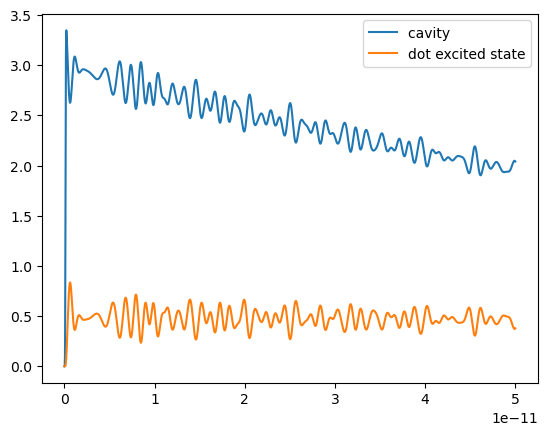

In [10]:
n_c=output.expect[0]
n_a=output.expect[1]
fig=plt.figure()
axes=fig.add_subplot(111)
line_c=axes.plot(tlist,n_c,label='cavity ')
line_a=axes.plot(tlist,n_a,label='dot excited state')
plt.legend()
plt.show()

In [11]:
qsave(output,'output CAD-1 E1.2 phonon_5K')

result=qload('output CAD-1')

In [12]:
#opt=Options(nsteps=5000000)
result1=mesolve(H,phi1,tlist,c_ops,[],options=opt,progress_bar=True)

10.0%. Run time:   0.22s. Est. time left: 00:00:00:01
20.0%. Run time:   0.37s. Est. time left: 00:00:00:01
30.0%. Run time:   0.53s. Est. time left: 00:00:00:01
40.0%. Run time:   0.68s. Est. time left: 00:00:00:01
50.0%. Run time:   0.84s. Est. time left: 00:00:00:00
60.0%. Run time:   1.00s. Est. time left: 00:00:00:00
70.0%. Run time:   1.17s. Est. time left: 00:00:00:00
80.0%. Run time:   1.34s. Est. time left: 00:00:00:00
90.0%. Run time:   1.51s. Est. time left: 00:00:00:00
Total run time:   1.69s


In [13]:
qsave(result1,'output CAD-1 wignerE1.2 phonon_5K')

result1=qload('output for fidelity')

fida=result1.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)
print(fida1[689])
k=(result1.states[732],0)
trr=[]
for i in range(0,len(fida1)):
    if fida1[i]>=0.79:
        trr.append(i)
        
print(trr)
        

fig=plt.figure()
n_c=result.expect[0]
n_a=result.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,fida1,'')
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()

#print(len(er))        
#print(fida1)        


import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM=[]
U=0   
while U<10:
    ggM.append(fida1[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1[i-5]+fida1[i-4]+fida1[i-3]+fida1[i-2]+fida1[i-1]+fida1[i])/6
    ggM.append(gg)
print(len(tlist),len(ggM)) 
#print(ggM)
#fida1[i-10]+fida1[i-9]+fida1[i-8]+fida1[i-7]+fida1[i-6]+fida1[i-5]+fida1[i-4]+fida1[i-3]+

fig=plt.figure()
n_c=result.expect[0]
n_a=result.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,ggM,'')
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()